In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [141]:
all_cooccs = {}
all_linker_vars = []
barcodes =  [13, 16, 17,19, 21]#[13, 14, 15,18, 20]
for barcode in barcodes: 
    FigFolder = f"/home/student/anna/DMS_analysis/final_output/Nanopore_P0115/barcode{barcode}/"
    with open(f"{FigFolder}/cooccurrences.txt", "r") as f:
        cooccurrences = f.read().split("\n")
    cooccs_counts = dict(Counter(cooccurrences))
    
    cooccs_perc = cooccs_counts.copy()#{k: v/sum(cooccs_counts.values())*100 for k, v in cooccs_counts.items()}
    cooccs_perc_filt = {k: v for k, v in cooccs_perc.items() if v > 50}.copy()

    ## normalize filtered cooccs_perc
    cooccs_perc_filt_norm =  cooccs_perc_filt.copy()#{k: v/sum(cooccs_perc_filt.values())*100 for k, v in cooccs_perc_filt.items()}

    all_linker_vars = list(set(all_linker_vars+ list(cooccs_perc_filt_norm.keys())))

    all_cooccs[barcode] = cooccs_perc_filt_norm


all_cooccs_df = pd.DataFrame(index = [str(bc) for bc in barcodes], columns = all_linker_vars, data = 0.0)

for barcode in barcodes:
    for linker in all_linker_vars:
        all_cooccs_df.loc[str(barcode), linker] = all_cooccs[barcode].get(linker, 0)


    

In [142]:
## sort by size 
all_cooccs[13] = dict(sorted(all_cooccs[13].items(), key=lambda item: item[1], reverse = True))
all_cooccs[13].pop("wt_wt")

63836

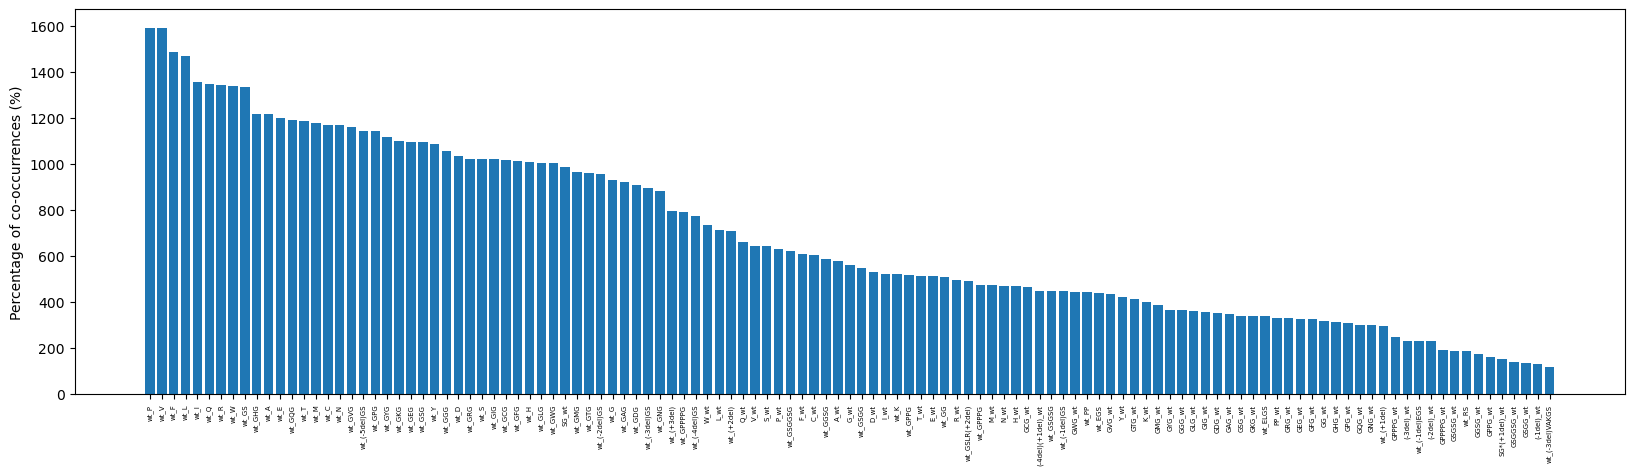

In [139]:
fig, axis = plt.subplots(1,1, figsize = (20, 5))
plt.bar(all_cooccs[13].keys(), all_cooccs[13].values())
plt.xticks(rotation=90, fontsize = 5)
##plot bars whose label does not include "wt" in red: 
for i, label in enumerate(all_cooccs[13].keys()):
    if "wt" not in label:
        plt.bar(i, all_cooccs[13][label], color = "red")
plt.ylabel("Percentage of co-occurrences (%)")
plt.savefig("/home/student/anna/DMS_analysis/final_output/Nanopore_P0115/cooccurrence_linkers_barcode13.png", bbox_inches = "tight")
plt.savefig("/home/student/anna/DMS_analysis/final_output/Nanopore_P0115/cooccurrence_linkers_barcode13.pdf", bbox_inches = "tight")
plt.show()

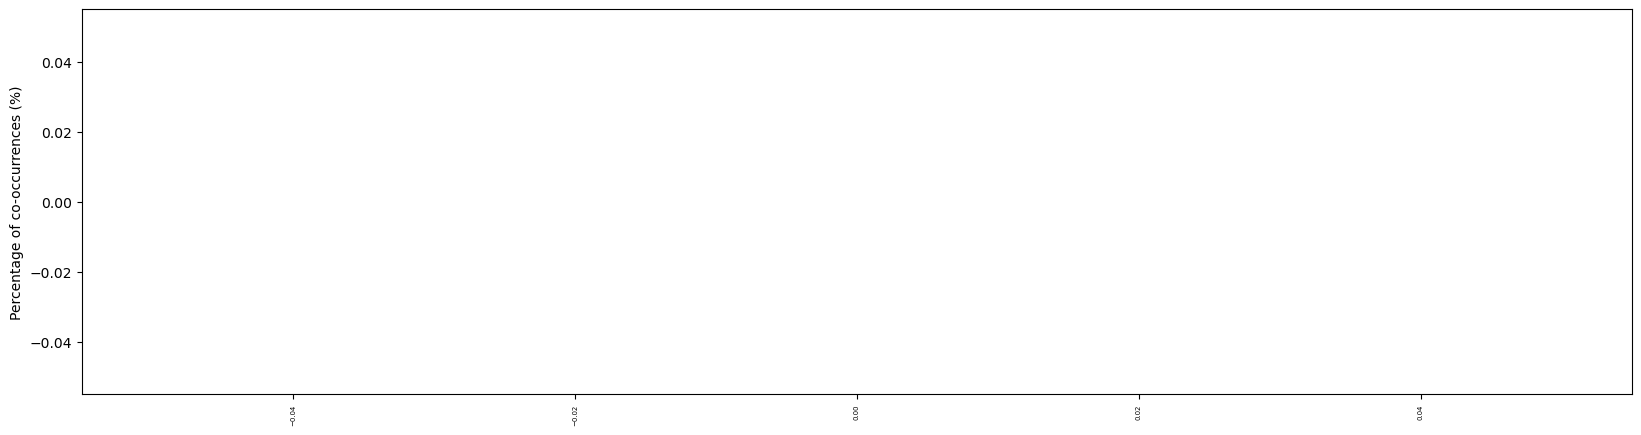

In [143]:
##filter out reads that have wt in the name 
all_cooccs[13] = {k: v for k, v in all_cooccs[13].items() if "wt" not in k}

fig, axis = plt.subplots(1,1, figsize = (20, 5))
plt.bar(all_cooccs[13].keys(), all_cooccs[13].values())
plt.xticks(rotation=90, fontsize = 5)
##plot bars whose label does not include "wt" in red: 
plt.ylabel("Percentage of co-occurrences (%)")
plt.savefig("/home/student/anna/DMS_analysis/final_output/Nanopore_P0115/cooccurrence_linkers_barcode13_only_coocc.png", bbox_inches = "tight")
plt.savefig("/home/student/anna/DMS_analysis/final_output/Nanopore_P0115/cooccurrence_linkers_barcode13_only_coocc.pdf", bbox_inches = "tight")
plt.show()

In [84]:
## filter df for linkers that have a overall occurrence of higher than 10 % 
all_cooccs_df = all_cooccs_df.loc[:, all_cooccs_df.max() > 1.5]

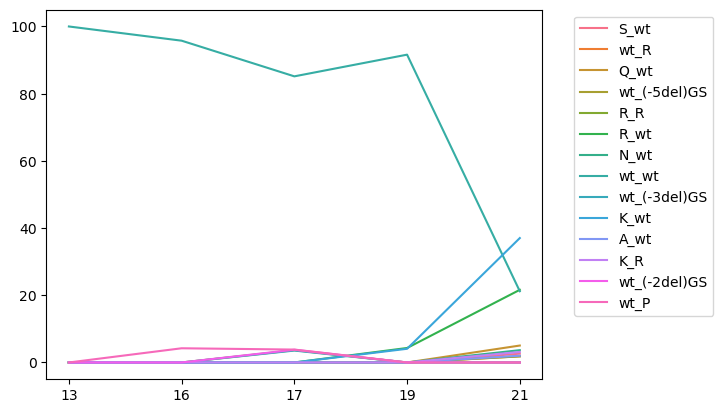

In [85]:
colors = ["#2C3E5E",  
    "#22577A",  # Deep blue
    "#38A3A5",  # Teal
    "#57CC99",  # Medium green
    "#80ED99",  # Bright green
    "#C7F9CC"
     ] # Light green

  # Number of distinct colors
colors = sns.color_palette("husl", all_cooccs_df.shape[1]) 


for i in all_cooccs_df.columns:
    plt.plot(all_cooccs_df[i], label = i, color = colors[all_cooccs_df.columns.get_loc(i)])
## put legend on right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [69]:
all_left_linkers = pd.DataFrame(dtype = float)
all_right_linkers = pd.DataFrame(dtype = float)
all_linker_vars = []
barcodes =  [13, 16, 17,19, 21]# [13, 14, 15,18, 20] #[13, 16, 17,19, 21]
for barcode in barcodes: 
    FigFolder = f"/home/student/anna/DMS_analysis/final_output/Nanopore_P0115/barcode{barcode}/"
    left_linkers = pd.read_csv(f"{FigFolder}/linker_distribution_R1.csv", index_col = 0).T
    left_linkers.index = [str(barcode)]
    all_left_linkers = pd.concat([all_left_linkers, left_linkers], axis = 0)

    right_linkers = pd.read_csv(f"{FigFolder}/linker_distribution_R2.csv", index_col = 0).T
    all_right_linkers = pd.concat([all_right_linkers, right_linkers], axis = 0)

all_right_linkers.index = [str(bc) for bc in barcodes]
all_left_linkers.index = [str(bc) for bc in barcodes]

all_right_linkers.fillna(0, inplace = True)
all_left_linkers.fillna(0, inplace = True)

In [70]:
## filter df for linkers that have a overall occurrence of higher than 10 % 
all_right_linkers = all_right_linkers.loc[:, all_right_linkers.max() > 1.5]
all_left_linkers = all_left_linkers.loc[:, all_left_linkers.max() > 1.5]

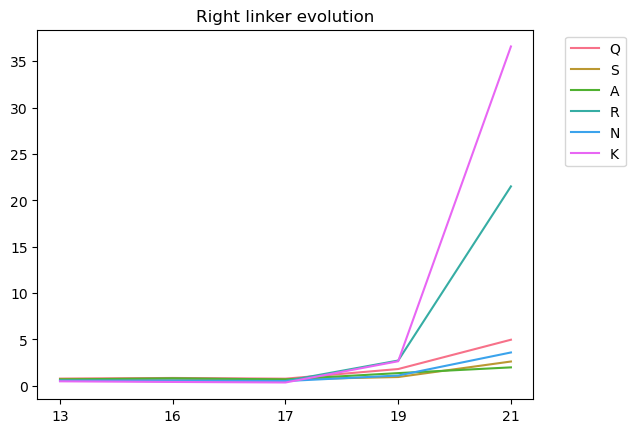

In [71]:
colors = ["#2C3E5E",  
    "#22577A",  # Deep blue
    "#38A3A5",  # Teal
    "#57CC99",  # Medium green
    "#80ED99",  # Bright green
    "#C7F9CC"
     ] # Light green

  # Number of distinct colors
colors = sns.color_palette("husl", all_left_linkers.shape[1]) 


for i in all_left_linkers.columns:
    plt.plot(all_left_linkers[i], label = i, color = colors[all_left_linkers.columns.get_loc(i)])
## put legend on right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Right linker evolution")
plt.show()

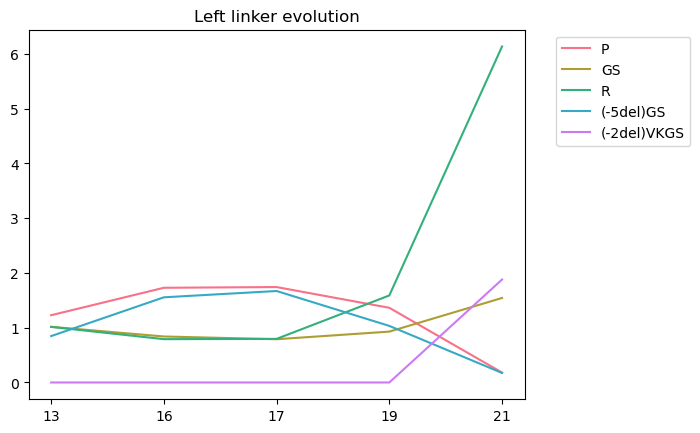

In [72]:
colors = ["#2C3E5E",  
    "#22577A",  # Deep blue
    "#38A3A5",  # Teal
    "#57CC99",  # Medium green
    "#80ED99",  # Bright green
    "#C7F9CC"
     ] # Light green

  # Number of distinct colors
colors = sns.color_palette("husl", all_right_linkers.shape[1]) 


for i in all_right_linkers.columns:
    plt.plot(all_right_linkers[i], label = i, color = colors[all_right_linkers.columns.get_loc(i)])
plt.title("Left linker evolution")
## put legend on right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()